# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 

response = request.urlopen(url2)
html2 = response.read().decode('utf8')
print("La longueur du texte est de", len(html2), "caractères.")

La longueur du texte est de 937706 caractères.


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [3]:
raw2 = BeautifulSoup(html2).get_text()
#raw2 = raw2.replace("\r", "").replace("\n", " ")

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [4]:
# Please write your Python code below and execute it.

# Derniers caractères de la partie à enlever avant le texte
start = 'codeCHInternet TLD.ch, .swiss'
# Premiers caractères de la partie à enlever après le texte
end = '[278][279]'

startIndex = raw2.index(start)+len(start)
endIndex = raw2.index(end)
raw2trimmed = raw2[startIndex:endIndex]

print(f"Les 100 premiers caractères du texte sont: {raw2trimmed[:100]}")
print(f"Les 100 derniers caractères du texte sont: {raw2trimmed[-100:]}")

Les 100 premiers caractères du texte sont: 
Switzerland, officially the Swiss Confederation, is a landlocked country located at the confluence 
Les 100 derniers caractères du texte sont:  Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [5]:
sentences = nltk.sent_tokenize(raw2trimmed, language='english')


In [6]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')

# Store the sentences in a file
for s in sentences:
    fd.write(s + '\n')

fd.close()


Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [7]:
# Please write your Python code below and execute it.
words2 = nltk.word_tokenize(raw2trimmed)
print("Le nombre de tokens est de", len(words2))


Le nombre de tokens est de 16788


Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [8]:
# Please write your Python code below and execute it.
text = nltk.Text(words2)


In [9]:
text.concordance("Switzerland")


Displaying 25 of 212 matches:
 Switzerland , officially the Swiss Confederat
a and Liechtenstein to the east . Switzerland is geographically divided among t
uding Zürich , Geneva and Basel . Switzerland originates from the Old Swiss Con
Reformation of the 16th century , Switzerland has maintained a policy of armed 
the Peace of Westphalia in 1648 . Switzerland has not fought an international w
ding processes worldwide . [ 17 ] Switzerland is the birthplace of the Red Cros
Area through bilateral treaties . Switzerland is a federal republic composed of
icity , and religion , leading to Switzerland being described as a Willensnatio
Due to its linguistic diversity , Switzerland is known by multiple native names
instead of the spoken languages . Switzerland is one of the world 's most devel
roduct per capita . [ 23 ] [ 24 ] Switzerland ranks first in the Human Developm
 Etymology Main article : Name of Switzerland The English name Switzerland is a
e of Switzerland The English name Switzerla

In [10]:
text.similar("country", num=10)

plateau alps population confederacy century war eu constitution second
confederation


In [11]:
text.collocation_list(num=10)

[('citation', 'needed'),
 ('Main', 'article'),
 ('United', 'Nations'),
 ('Main', 'articles'),
 ('St.', 'Gallen'),
 ('Federal', 'Council'),
 ('European', 'Union'),
 ('Swiss', 'Plateau'),
 ('Federal', 'Assembly'),
 ('direct', 'democracy')]

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [12]:
# Please write your Python code below and execute it.
vocabulary = sorted(set(text))
print(f"Le texte contient {len(vocabulary)} mots uniques.")

# words with more than 15 characters
words15Char = [w for w in vocabulary if len(w) > 15]
print(f"Le texte contient {len(words15Char)} mots avec plus de 15 caractères.")
print(words15Char)


Le texte contient 4054 mots uniques.
Le texte contient 23 mots avec plus de 15 caractères.
['Basel-Landschaft', 'Donau-Iller-Rhine-Limes', 'Franco-Provençal', 'Gallen-Altenrhein', 'Italian-speaking', 'Non-Proliferation', 'Romansh-speaking', 'Sonderbundskrieg', 'SwitzerlandSwiss', 'Switzerland–European', 'Telecommunication', 'Willensnationcode', 'authoritarianism', 'autobahn/autoroute', 'commander-in-chief', 'energy-producing', 'hydroelectricity', 'instruments/watches', 'machines/electronics', 'near-Mediterranean', 'non-German-speaking', 'pastures/grazing', 'policies—contributes']


Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [13]:
from nltk import FreqDist

fdist = nltk.FreqDist([w.lower() for w in text if w.isalpha()])

mostFrequentWord = fdist.most_common(30)

for word, frequency in mostFrequentWord:
    print(f"{word:<25}: {frequency:>4}")


the                      : 1127
of                       :  550
and                      :  440
in                       :  430
to                       :  232
switzerland              :  212
a                        :  182
swiss                    :  179
is                       :  148
as                       :  101
federal                  :   92
by                       :   87
are                      :   87
was                      :   86
for                      :   81
with                     :   73
from                     :   68
it                       :   60
at                       :   52
world                    :   52
on                       :   50
has                      :   46
its                      :   43
most                     :   41
population               :   39
one                      :   39
an                       :   38
cantons                  :   38
main                     :   38
other                    :   38


Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

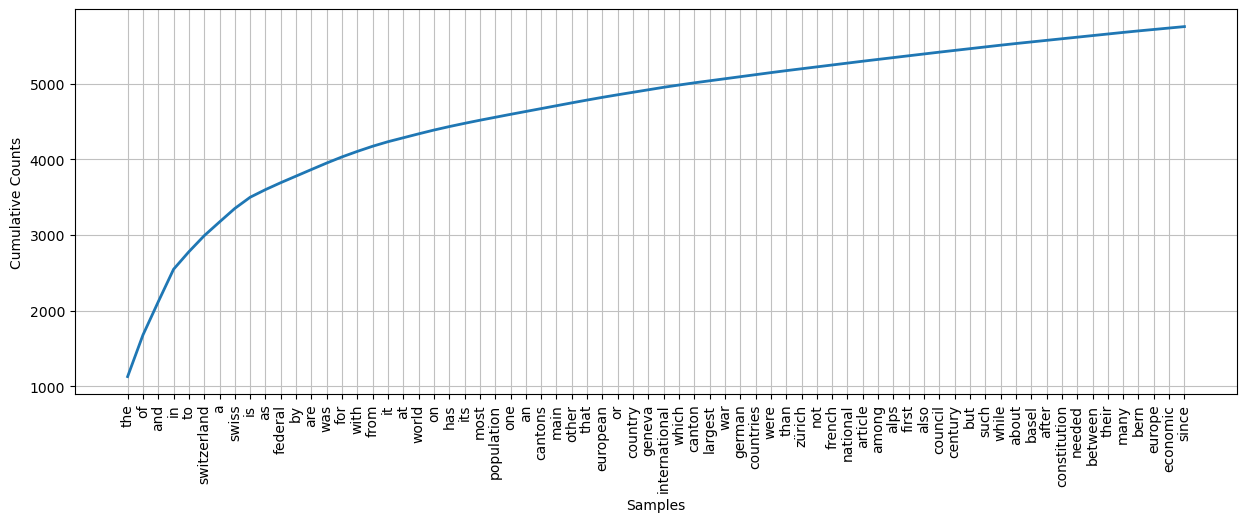

In [14]:
# Please write your Python code below and execute it.
plt.figure(figsize=(15, 5))
fdist.plot(70, cumulative=True);


Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

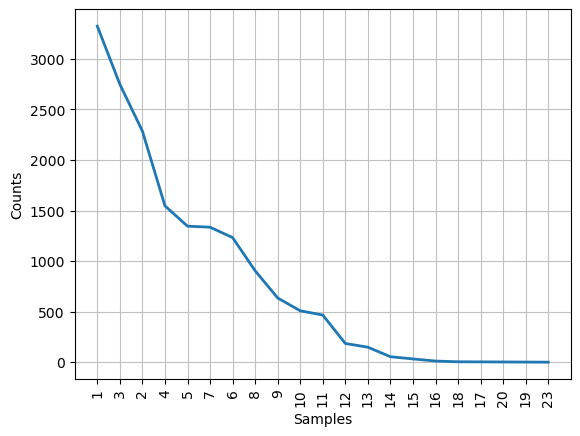

La longueur la plus fréquente est 1 avec une fréquence de 3324.
Longueur : 1 - Fréquence : 3324
Longueur : 3 - Fréquence : 2749
Longueur : 2 - Fréquence : 2286
Longueur : 4 - Fréquence : 1547
Longueur : 5 - Fréquence : 1346
Longueur : 7 - Fréquence : 1336
Longueur : 6 - Fréquence : 1233
Longueur : 8 - Fréquence : 905
Longueur : 9 - Fréquence : 636
Longueur : 10 - Fréquence : 509
Longueur : 11 - Fréquence : 467
Longueur : 12 - Fréquence : 186
Longueur : 13 - Fréquence : 149
Longueur : 14 - Fréquence : 55
Longueur : 15 - Fréquence : 33
Longueur : 16 - Fréquence : 12
Longueur : 18 - Fréquence : 5
Longueur : 17 - Fréquence : 4
Longueur : 20 - Fréquence : 3
Longueur : 19 - Fréquence : 2
Longueur : 23 - Fréquence : 1


In [15]:
# Please write your Python code below and execute it.

tokens = nltk.word_tokenize(raw2trimmed)

# Création d'une liste avec la longueur de chaque token
token_lengths = [len(token) for token in tokens]

# Création d'un objet FreqDist à partir de la liste de longueurs de token
fdist = FreqDist(token_lengths)

# Affichage de la distribution des occurrences
fdist.plot(30, cumulative=False)

# Affichage de la longueur la plus fréquente
most_common_length, frequency = fdist.most_common(1)[0]
print(f"La longueur la plus fréquente est {most_common_length} avec une fréquence de {frequency}.")

# Affichage de l'évolution de la longueur en fonction de la fréquence
for length, frequency in fdist.most_common():
    print(f"Longueur : {length} - Fréquence : {frequency}")



## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 